In [6]:
x = ['a', 'b', 'c']

In [9]:
dict(enumerate(x))

{0: 'a', 1: 'b', 2: 'c'}

In [12]:
f = open('dataset/obj.names', mode='r')

In [22]:
f.seek(0)

0

In [23]:
a = f.read()

In [25]:
a.splitlines()

['shallow', 'medium', 'deep']

In [26]:
import glob

In [27]:
x = glob.glob('./dataset/img/*.jpeg')

In [29]:
x[0]

'./dataset/img/458.jpeg'

In [46]:
txt_file = open('./dataset/img/100.txt')

In [47]:
txt_file.seek(0)
a = txt_file.read()

In [48]:
a.splitlines()

['0 0.206797 0.142321 0.124976 0.08665',
 '0 0.582557 0.091497 0.116644 0.101647',
 '0 0.630881 0.258965 0.093315 0.083317',
 '0 0.610885 0.35228 0.089983 0.069986',
 '0 0.253455 0.418934 0.408254 0.226623',
 '0 0.865003 0.303956 0.141639 0.129975',
 '0 0.748359 0.400604 0.088316 0.093315',
 '0 0.875834 0.469757 0.073319 0.098314']

In [49]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./dataset/img/100.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

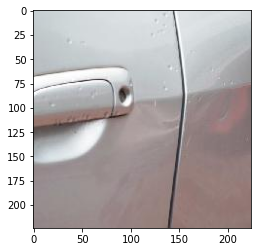

In [50]:
plt.imshow(img)

In [51]:
dh, dw, _ = img.shape

In [52]:
for bbox in a.splitlines():
    _, x_center, y_center, w, h = map(float, bbox.split(' '))

    x1 = int((x_center - w / 2) * dw)
    y1 = int((y_center - h / 2) * dh)
    x2 = int((x_center + w / 2) * dw)
    y2 = int((y_center + h / 2) * dh)

    if x1 < 0:
        x1 = 0
    if x2 > dw - 1:
        x2 = dw - 1
    if y1 < 0:
        y1 = 0
    if y2 > dh - 1:
        y2 = dh - 1

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

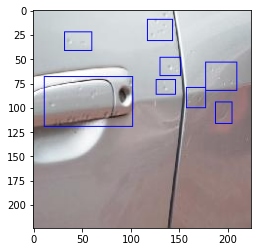

In [53]:
plt.imshow(img)
plt.show()

In [54]:
z = './dataset/img/100.jpeg'

In [57]:
z[:-5] + '.txt'

'./dataset/img/100.txt'

In [61]:
z.split('/')[-1][:-5]

'100'

In [65]:
a = 1.

In [66]:
a

1.0

In [67]:
str(a)

'1.0'

In [6]:
import glob

dataset_dir='./dent_data/'
shallow_image_dir = glob.glob(dataset_dir + 'shallow/' + '*.png')
medium_image_dir = glob.glob(dataset_dir + 'medium/' + '*.png')
deep_image_dir = glob.glob(dataset_dir + 'deep/' + '*.png')
all_data = shallow_image_dir + medium_image_dir + deep_image_dir

In [9]:
x = all_data[0]

In [12]:
x.split('/')

['.', 'dent_data', 'shallow', '1259_0.png']

In [13]:
all_data[0].split('/')

['.', 'dent_data', 'shallow', '1259_0.png']

In [18]:
import torch.distributed as dist

def is_dist_avail_and_initialized():
    if not dist.is_available():
        return False
    if not dist.is_initialized():
        return False
    return True

def get_world_size():
    if not is_dist_avail_and_initialized():
        return 1
    return dist.get_world_size()


def get_rank():
    if not is_dist_avail_and_initialized():
        return 0
    return dist.get_rank()

In [19]:
get_world_size()

1

In [20]:
import torch.distributed as dist

In [21]:
import timm
from pprint import pprint
model_names = timm.list_models(pretrained=True)
pprint(model_names)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k',
 'crossvit_9_240',
 'crossv

In [2]:
import torch

/home/hiepubuntu/anaconda3/envs/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
checkpoint = torch.hub.load_state_dict_from_url(
    url="https://dl.fbaipublicfiles.com/deit/S24_224.pth",
    map_location="cpu", check_hash=True
)

Downloading: "https://dl.fbaipublicfiles.com/deit/S24_224.pth" to /home/hiepubuntu/.cache/torch/hub/checkpoints/S24_224.pth


AttributeError: 'NoneType' object has no attribute 'group'

In [3]:
torch.__version__

'1.6.0'